In [1]:
import os, sys, numpy as np
import matplotlib.pyplot as plt

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
print(f"Current path: {os.getcwd()}")
sys.path.append('./')

from regressors.gaussianprocess import GaussianProcessRegressorRBF, HeteroscedasticGaussianProcessRegressorRBF

Current path: /Users/marcomussi/git/PricingComplementaryProducts.


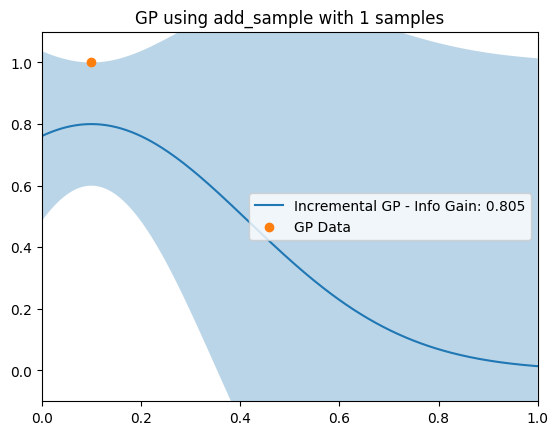

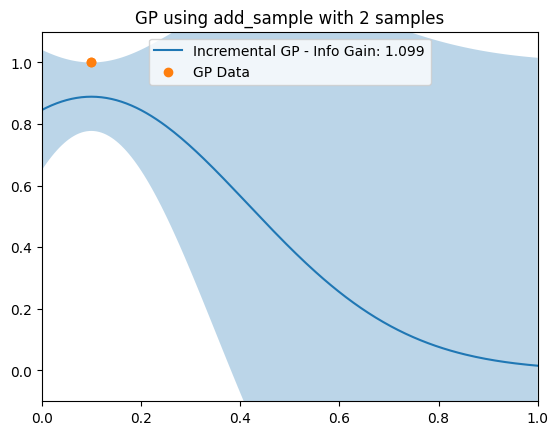

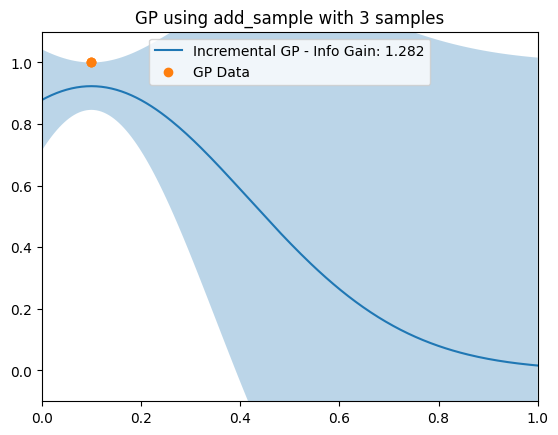

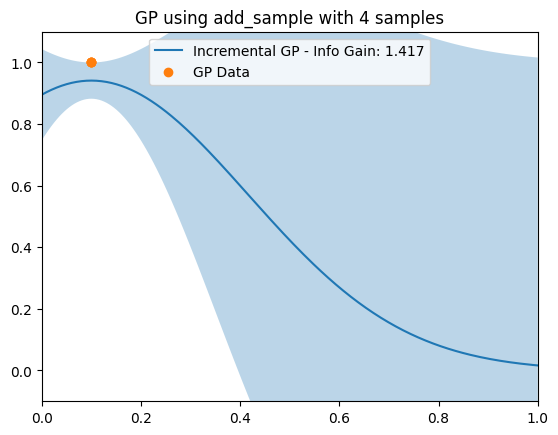

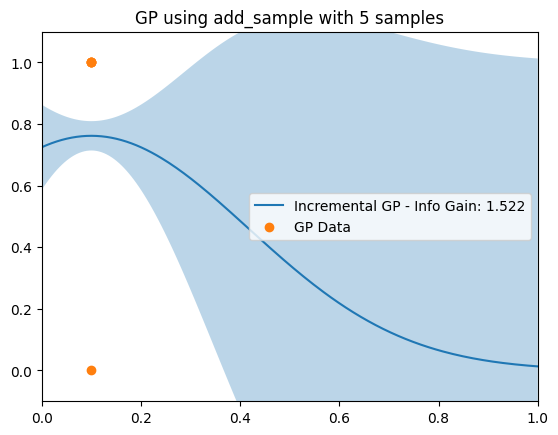

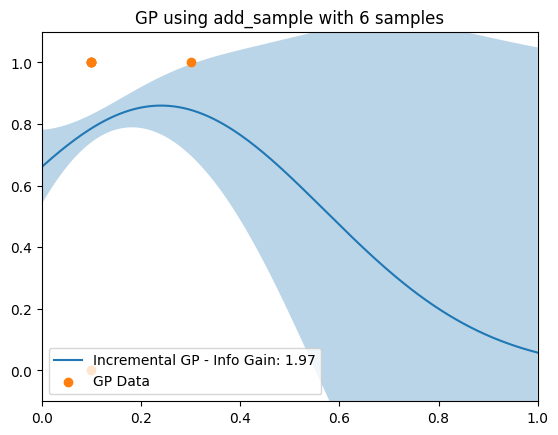

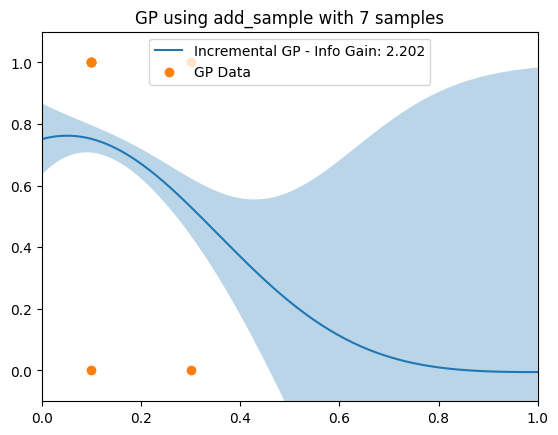

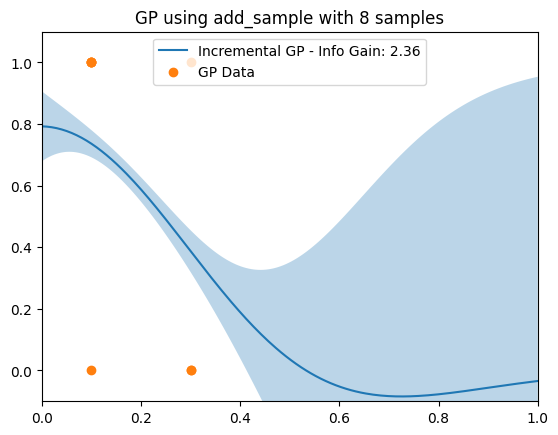

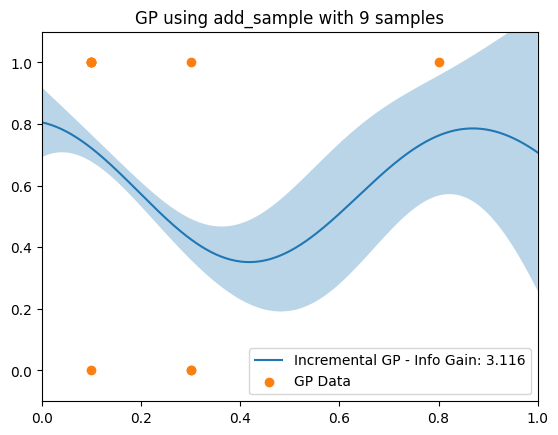

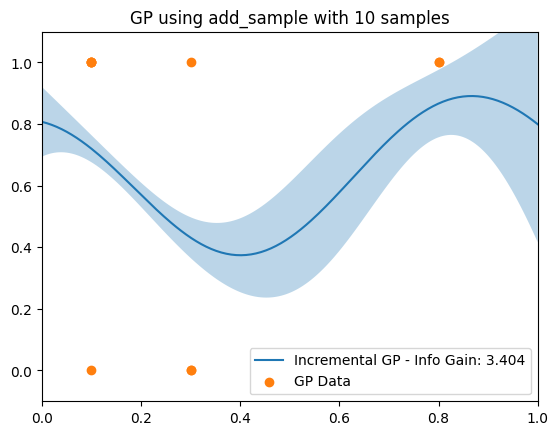

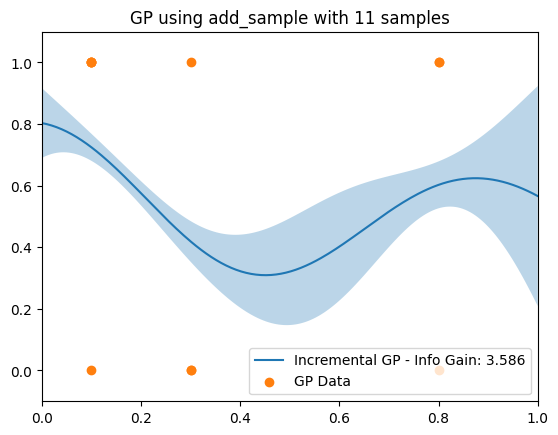

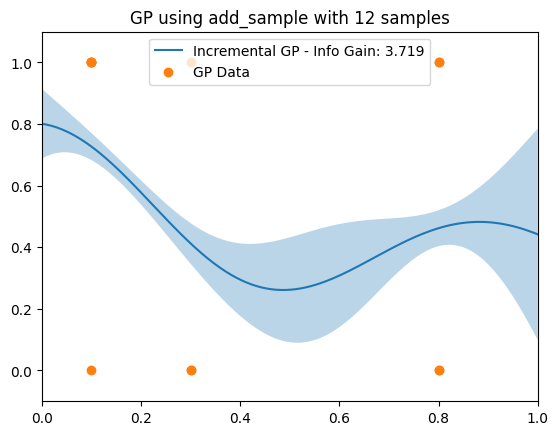

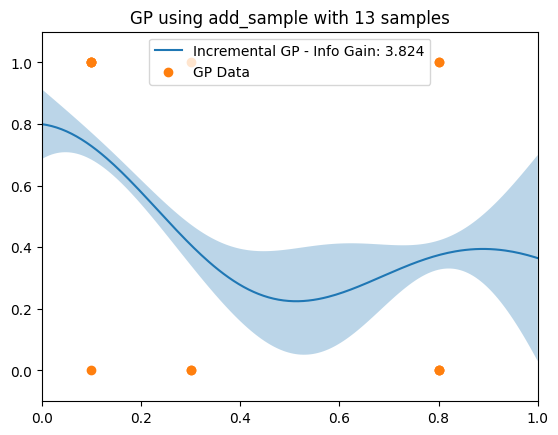

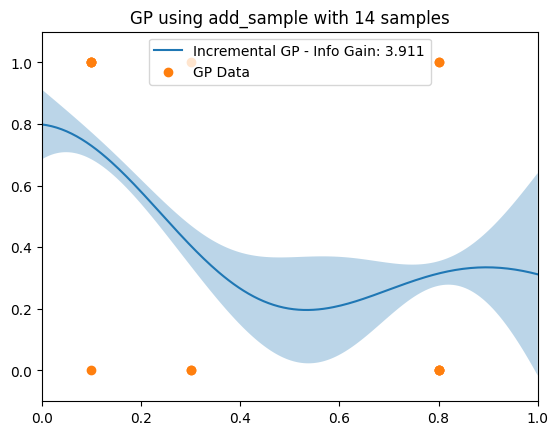

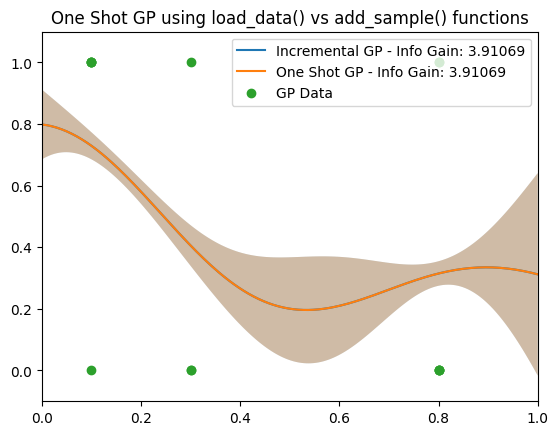

In [2]:
kernel_L = 5
base_sigma_sq = 0.25
n_samples_plt = 200
x_plt = np.linspace(0, 1, n_samples_plt)

data_x = np.vstack((0.1 * np.ones((5, 1)), 0.3 * np.ones((3, 1)), 0.8 * np.ones((6, 1))))
data_y = np.vstack((np.ones((4, 1)), np.zeros((1, 1)), np.ones((1, 1)), np.zeros((2, 1)), np.ones((2, 1)), np.zeros((4, 1))))

reg = GaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, keep_info_gain_estimate=True)
for i in range(data_x.shape[0]):
    plt.figure()
    reg.add_sample(data_x[i, :].reshape(1, 1), data_y[i, :].reshape(1, 1))
    y_hat, y_sigma = reg.compute(x_plt.reshape(-1, 1))
    plt.plot(x_plt, y_hat, label=f"Incremental GP - Info Gain: {np.round(reg.get_info_gain(), 3)}")
    plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)
    plt.scatter(data_x[:i+1], data_y[:i+1], label="GP Data")
    plt.title(f"GP using add_sample with {i+1} samples")
    plt.xlim([0, 1])
    plt.ylim([- 0.1, 1.1])
    plt.legend()

plt.figure()
plt.plot(x_plt, y_hat, label=f"Incremental GP - Info Gain: {np.round(reg.get_info_gain(), 5)}")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)

reg = GaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, keep_info_gain_estimate=True)
reg.load_data(data_x, data_y)
y_hat, y_sigma = reg.compute(x_plt.reshape(-1, 1))
plt.plot(x_plt, y_hat, label=f"One Shot GP - Info Gain: {np.round(reg.get_info_gain(), 5)}")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)

plt.scatter(data_x, data_y, label="GP Data")
plt.title("One Shot GP using load_data() vs add_sample() functions")
plt.xlim([0, 1])
plt.ylim([- 0.1, 1.1])
plt.legend()

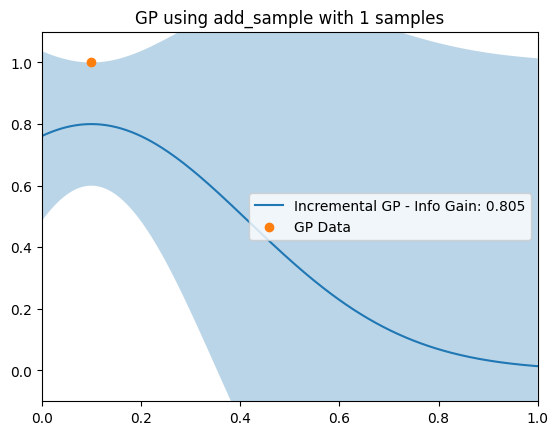

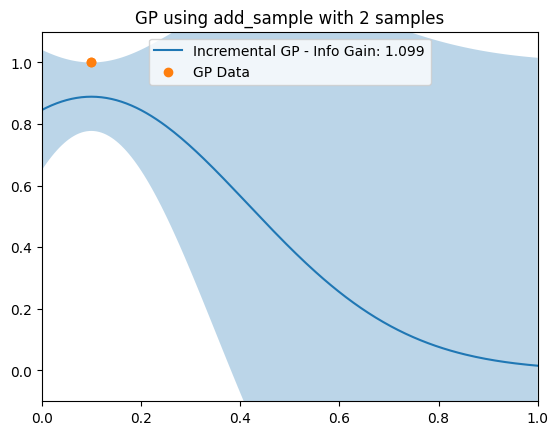

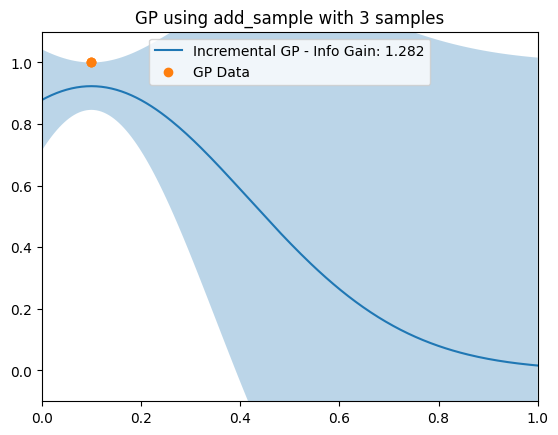

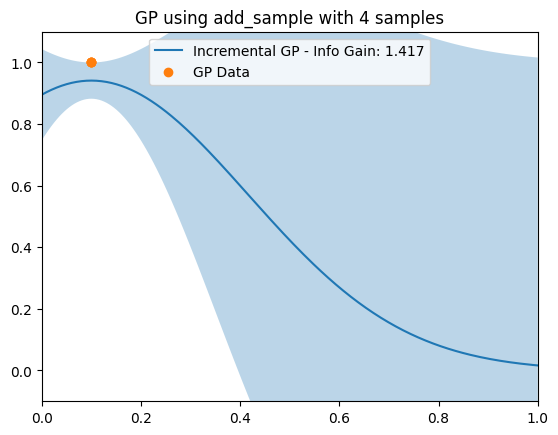

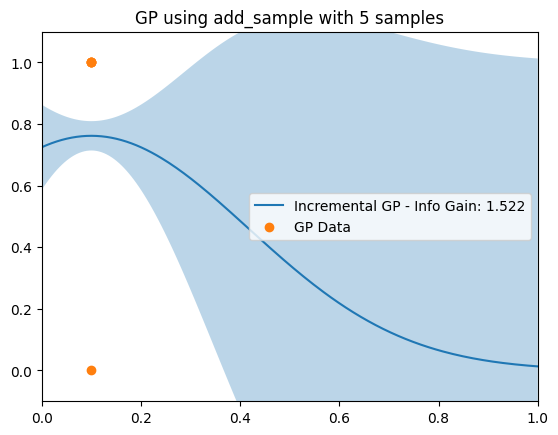

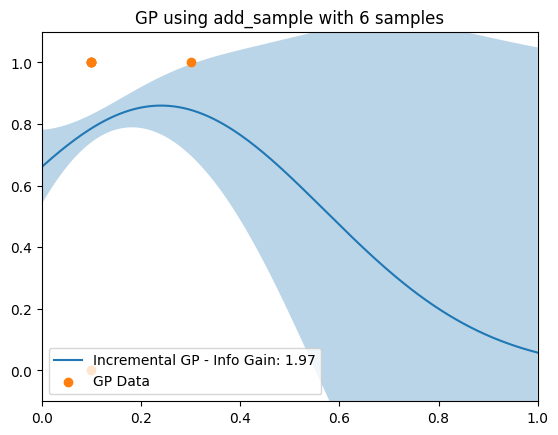

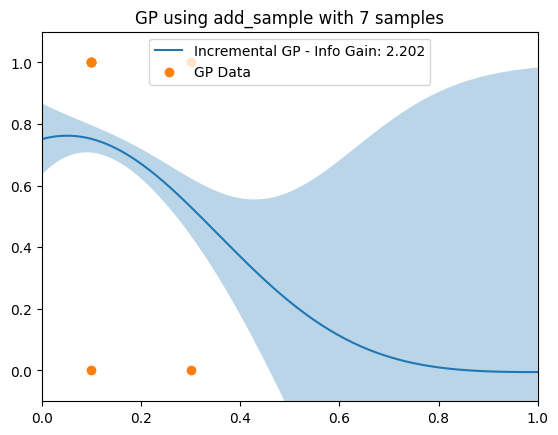

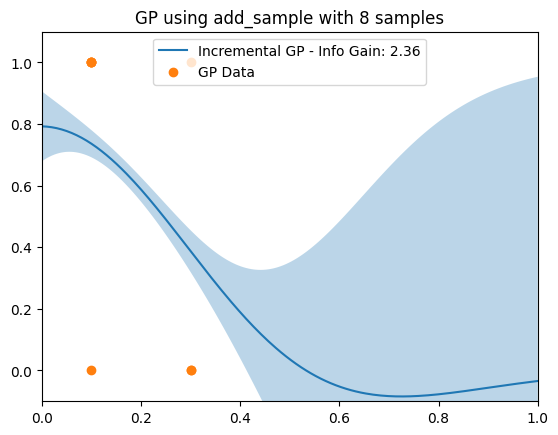

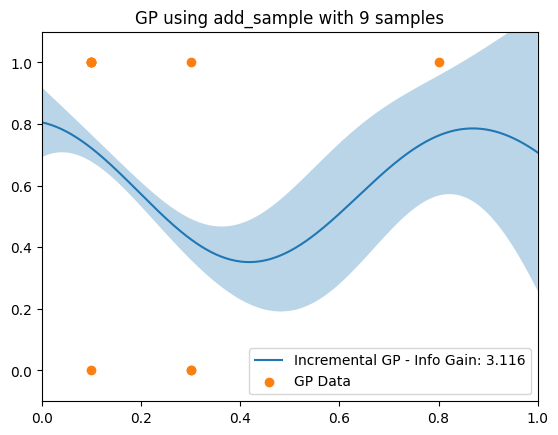

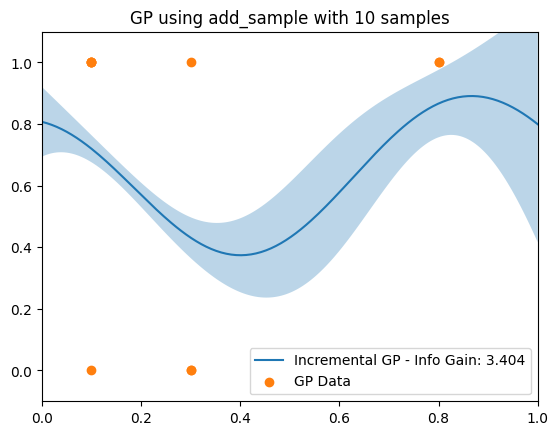

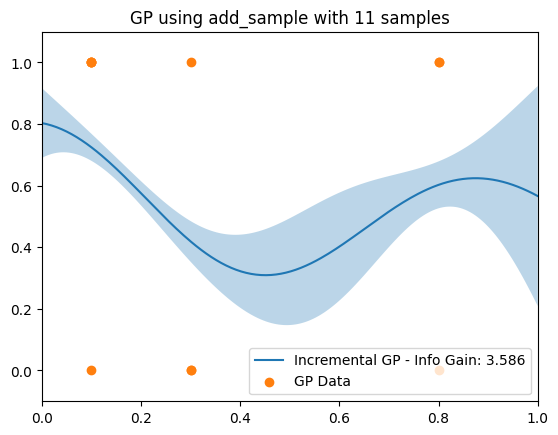

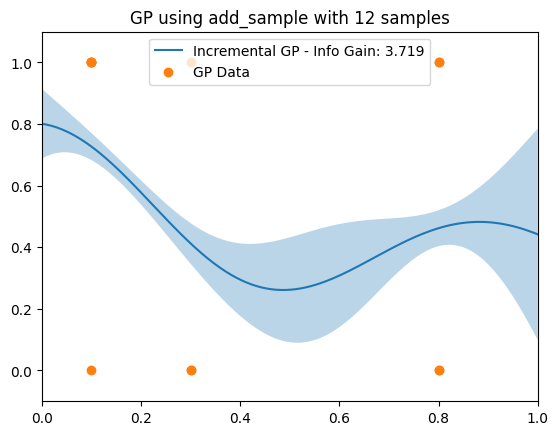

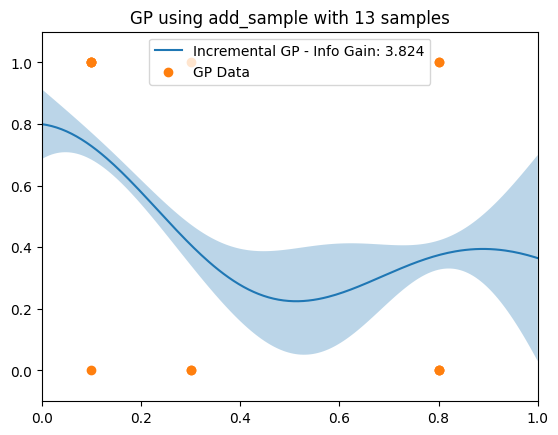

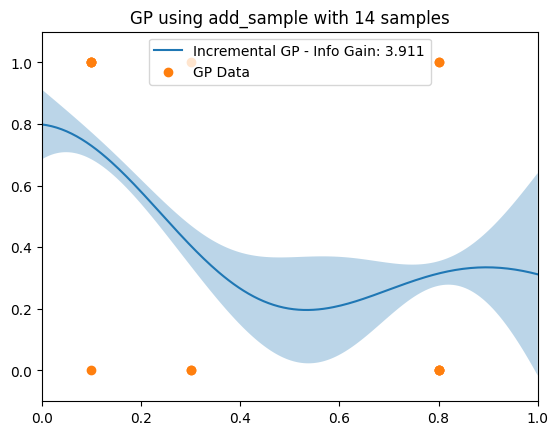

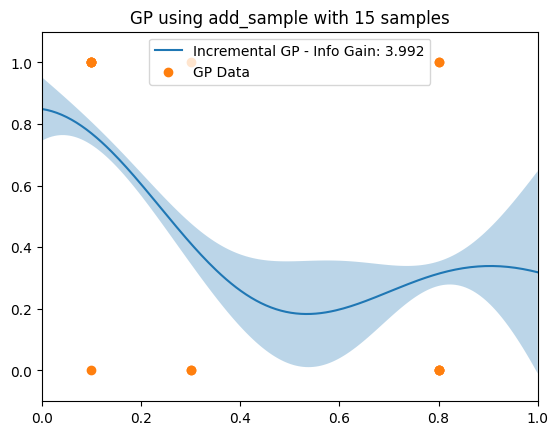

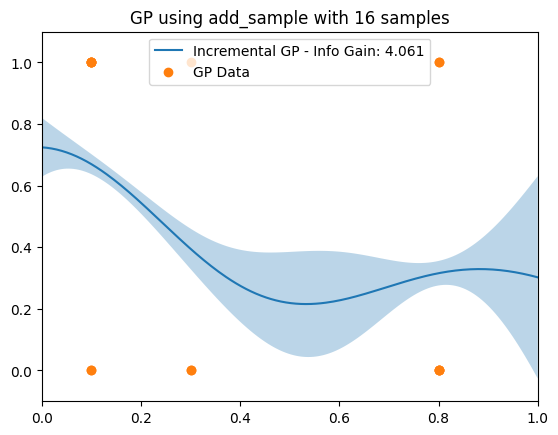

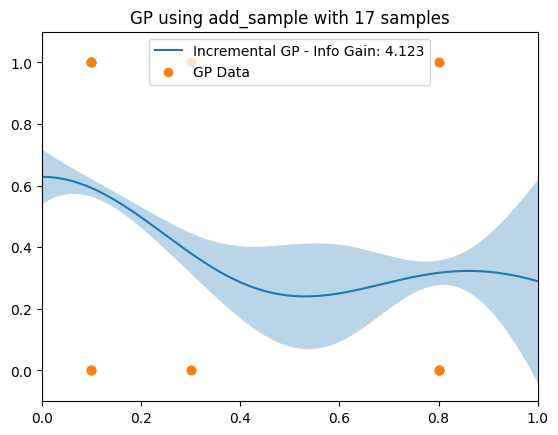

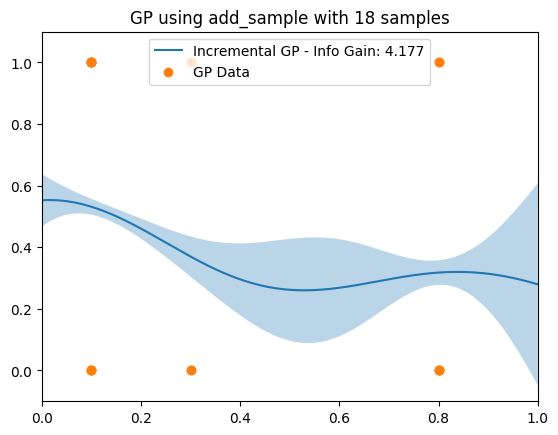

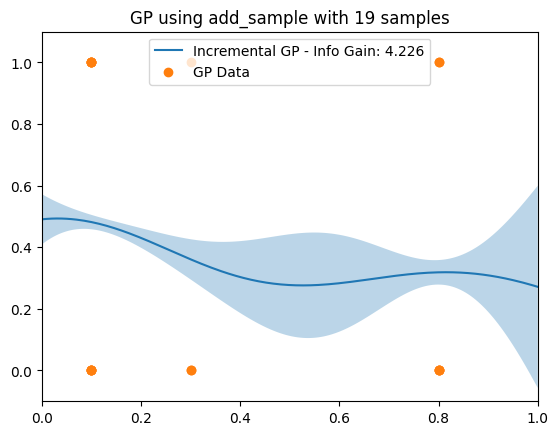

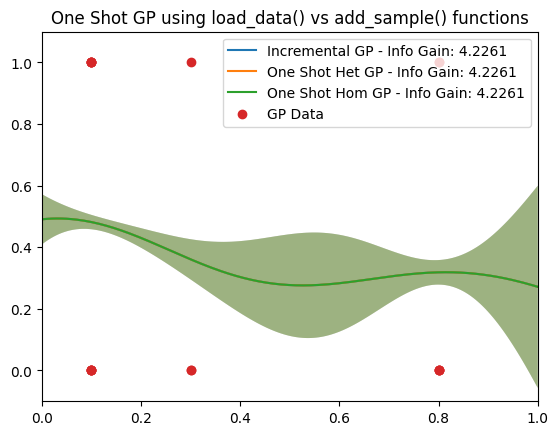

In [3]:
data_x = np.vstack((0.1 * np.ones((5, 1)), 0.3 * np.ones((3, 1)), 0.8 * np.ones((6, 1)), 0.1 * np.ones((5, 1))))
data_y = np.vstack((np.ones((4, 1)), np.zeros((1, 1)), np.ones((1, 1)), np.zeros((2, 1)), np.ones((2, 1)), np.zeros((4, 1)), np.ones((1, 1)), np.zeros((4, 1))))

reg = HeteroscedasticGaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, one_sample_mod=True)
for i in range(data_x.shape[0]):
    
    reg.add_sample(data_x[i, :].reshape(1, 1), data_y[i, :].reshape(1, 1))
    y_hat, y_sigma = reg.compute(x_plt.reshape(-1, 1))
    plt.figure()
    plt.plot(x_plt, y_hat, label=f"Incremental GP - Info Gain: {np.round(reg.get_info_gain(), 3)}")
    plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)
    plt.scatter(data_x[:i+1], data_y[:i+1], label="GP Data")
    plt.title(f"GP using add_sample with {i+1} samples")
    plt.xlim([0, 1])
    plt.ylim([- 0.1, 1.1])
    plt.legend()

plt.figure()
plt.plot(x_plt, y_hat, label=f"Incremental GP - Info Gain: {np.round(reg.get_info_gain(), 5)}")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)

regHetOS = HeteroscedasticGaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, one_sample_mod=False)
regHetOS.load_data(data_x, data_y, base_sigma_sq * np.ones((19, )))
y_hat, y_sigma = regHetOS.compute(x_plt.reshape(-1, 1))
plt.plot(x_plt, y_hat, label=f"One Shot Het GP - Info Gain: {np.round(regHetOS.get_info_gain(), 5)}")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)

regHomOS = GaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, keep_info_gain_estimate=True)
regHomOS.load_data(data_x, data_y)
y_hat, y_sigma = regHomOS.compute(x_plt.reshape(-1, 1))
plt.plot(x_plt, y_hat, label=f"One Shot Hom GP - Info Gain: {np.round(regHomOS.get_info_gain(), 5)}")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, alpha=0.3)

plt.scatter(data_x, data_y, label="GP Data")

plt.title("One Shot GP using load_data() vs add_sample() functions")
plt.xlim([0, 1])
plt.ylim([- 0.1, 1.1])
plt.legend()